# MODSIM Project_2

By Corey Cochran-Lepiz
   William Fairman
   
Thermal Person Insulation



In [1]:
# If you want the figures to appear in the notebook, 
# and you want to interact with them, use
# %matplotlib notebook

# If you want the figures to appear in the notebook, 
# and you don't want to interact with them, use
# %matplotlib inline

# If you want the figures to appear in separate windows, use
# %matplotlib qt5

# tempo switch from one to another, you have to select Kernel->Restart

%matplotlib inline

from math import *
from modsim import *

## Main Equations
delta T = -r(T_i - T_env)*timeStep + mu*persons

T = T(init-Tenv)e^(-rt) + T_env

r = a -bx

c = specific heat of human


# Main Code Space
Only work on main when we are together or when we are knowling working independent.


Saving figure to file comparison_mu.png
Saving figure to file parameter_sweep.png
Saving figure to file parameter_sweep_of_mu.png


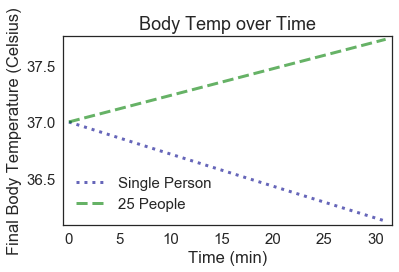

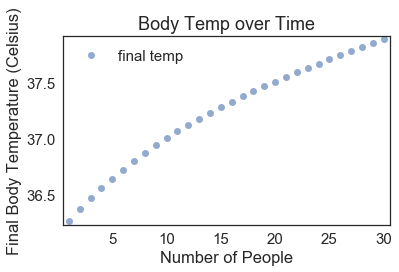

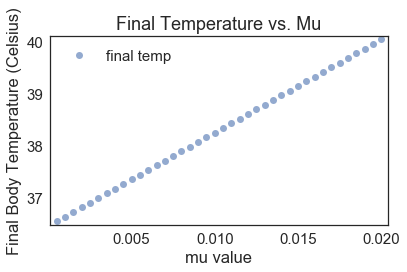

In [4]:
#Run Cell

sys = make_system(T_env=0,t_end=30,lbs=62,x=0
                                 ) #Creates system

xcompare(sys,25)

#run_sim(sys,update)

#plot_sim(sys)

xsweep(x1=1, x2=30, st=1, t_end=30, boo=True)
mu_sweep(m1=.0005,m2=.02,st=.0005,t_end=30)
#print(sys.results)


In [2]:
def make_system(T_env=0, t_end=10, lbs=62, mu=.001, x=1,r_i =.0008, dt=1):
    T_i = 37                                            #initial temp
    c_lbs = 3500                                              
    init = State(temp=T_i)
    
    c = c_lbs * lbs
    r = r_i*exp(-x/10)
    
    system = System(init=init, T_env=T_env, 
                    r=r, mu=mu, c=c, x=x,
                    t0=0, t_end=t_end, dt=dt, T_i=T_i,lbs=lbs,r_i=r_i)
    return system

def update(state, dt, system): #updates the temperature using the function we developed
    unpack(system)
    T = state.temp
    
    T += -r * (T - T_env)*dt + mu * (x+1) #T is the temp of the person in the center
    #print(T)
    return State(temp=T)


def run_sim(system, update_func):
    
    frame = TimeFrame(columns=system.init.index)
    frame.loc[system.t0] = system.init
    ts = linrange(system.t0, system.t_end, system.dt)
    
    for t in ts:
        frame.loc[t+dt] = update_func(frame.loc[t], system.dt, system)
        #frame.loc[t+1] = update(system)
    
    system.results = frame
    
    
def plot_sim(system):               #simple plot function, needs to be updated to make it look prettier
    plot(system.results, style= 'b-', label= 'temp')
    decorate(xlabel='Time (min)',
             ylabel='Body Temperature (Celsius)',
             title='Body Temp over Time')
    #savefig('ind_body_temp.pdf')
    
def rsweep(system,r1,r2,st):
    newfig()
    lin = linrange(r1,r2,st)
    for x in lin:
        system.r = x
        run_sim(system,update)
        plot(system.results)
    decorate(xlabel='Time (min)',
             ylabel='Body Temperature (Celsius)',
             title='Body Temp over Time')

def xsweep(x1,x2,st,t_end,boo): #x1 is the starting number of peopple
                                #x2 is the ending number of people
                                #st is the steps between x1 and x2
    newfig()
    
    if boo:
        temp_record = TimeSeries()
        
        lin = linrange(x1,x2,st)
        for x in lin:
            system = make_system(t_end=t_end,x=x)
            run_sim(system,update)
            plot(x,system.results.loc[system.t_end],'o',label='final temp')
            
            temp_record[x] = system.results.loc[system.t_end]
            
        decorate(xlabel='Number of People',
                 ylabel='Final Body Temperature (Celsius)',
                 title='Body Temp over Time',)
        plt.tight_layout()
        savefig('parameter_sweep.png')
        #print(temp_record)
    else:
        system = make_system(t_end=t_end,x=x2)
        run_sim(system, update)
        plot(system.results)
        decorate(xlabel='Time (min)',
             ylabel='Body Temperature (Celsius)',
             title='Final Temperature vs. Number of People')

def xcompare(system,x1):
                 
        unpack(system)
        sys = make_system(T_env=T_env, t_end=t_end, lbs=lbs, mu=mu, x=0,r_i =r_i, dt=dt)
        run_sim(sys,update)
        newfig()
        plot(sys.results,':',color='darkblue',label='Single Person')
        sys = make_system(T_env=T_env, t_end=t_end, lbs=lbs, mu=mu, x=x1,r_i =r_i, dt=dt)
        run_sim(sys,update)
        plot(sys.results,'--',color='green',label='%s People'%x)
           
        decorate(xlabel='Time (min)',
                 ylabel='Final Body Temperature (Celsius)',
                 title='Body Temp over Time')
        plt.tight_layout()
        savefig('comparison_mu.png')
    

def mu_sweep(m1,m2,st,t_end): #x1 is the starting number of peopple
                                #x2 is the ending number of people
                                #st is the steps between x1 and x2
        newfig()
        lin = linrange(m1,m2,st)
        for x in lin:
            system = make_system(t_end=t_end,x=5, mu=x)
            run_sim(system,update)
            plot(x,system.results.loc[system.t_end],'o',label='final temp')
            
        decorate(xlabel='mu value',
                 ylabel='Final Body Temperature (Celsius)',
                 title='Final Temperature vs. Mu',)
        plt.tight_layout()
        savefig('parameter_sweep_of_mu.png')


    
    

##################################################

def find_r(T_i, T_f, T_env, ):
    coef = log((T_f - T_env) / (T_i - T_env))
    return -coef / dt

def fun(x): #test FUNction
    a = []
    y = True
    while(y): #Endless while loops, yay!
        b = [int(d) for d in str(x)] #Odd syntax but it works to create a list of the digits of a given number
        sum1 = 0
        for f in b:
            sum1 += f**2
        if sum1 == 1:
            print("Happy number!")
            print(a)
            return
        elif sum1 in a:
            print("Not a happy number :(")
            a.append(sum1)
            print(a)
            return
        else:
            a.append(sum1)
        x = sum1